In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/database

/content/drive/MyDrive/database


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.12.0


#Data Preprocessing

In [ ]:
import cv2,os
data_path='/content/drive/MyDrive/database'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)

{'Normal': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Doubtful': 4}
['Normal', 'Mild', 'Moderate', 'Severe', 'Doubtful']
[0, 1, 2, 3, 4]


In [ ]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
        
            data.append(resized)
            label.append(label_dict[category])
           
        except Exception as e:
            print('Exception:',e)
           

# Recale and assign  catagorical labels

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from keras.utils import np_utils
new_label=np_utils.to_categorical(label)

In [ ]:
new_label.shape

(4268, 5)

#CNN Model

In [ ]:
data.shape

(4268, 256, 256, 1)

In [ ]:
data.shape[1:]

(256, 256, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))


model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))


model.add(Dense(5,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     1280      
                                                                 
 activation (Activation)     (None, 254, 254, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

# Splitting data into traning and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

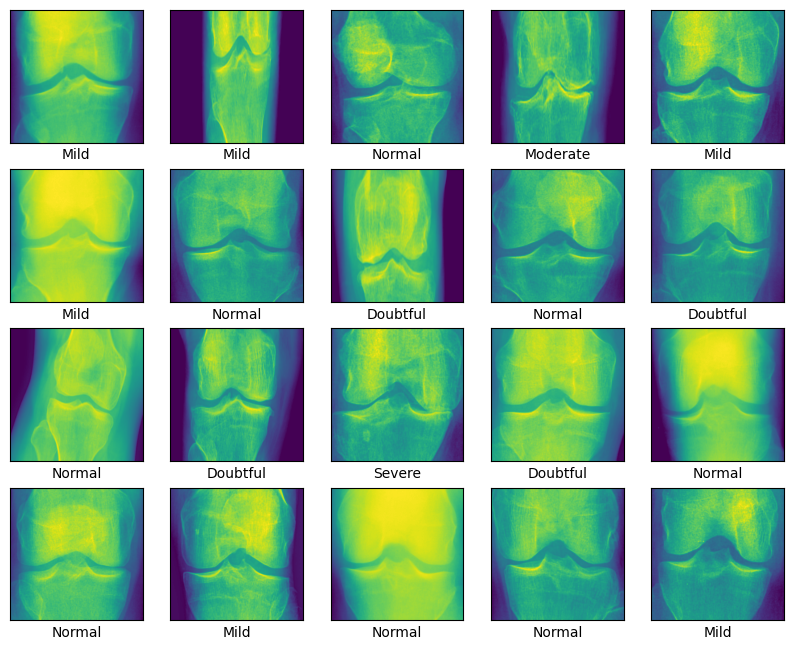

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [ ]:
history=model.fit(x_train,y_train,epochs=100,batch_size=16,validation_split=0.1)


Epoch 1/100
216/216 [==============================] - 30s 67ms/step - loss: 1.2994 - accuracy: 0.4696 - val_loss: 1.3042 - val_accuracy: 0.4623
Epoch 2/100
216/216 [==============================] - 14s 65ms/step - loss: 1.2561 - accuracy: 0.4734 - val_loss: 1.2556 - val_accuracy: 0.4519
Epoch 3/100
216/216 [==============================] - 14s 64ms/step - loss: 1.2394 - accuracy: 0.4844 - val_loss: 1.2530 - val_accuracy: 0.4545
Epoch 4/100
216/216 [==============================] - 14s 65ms/step - loss: 1.2270 - accuracy: 0.4832 - val_loss: 1.2329 - val_accuracy: 0.4753
Epoch 5/100
216/216 [==============================] - 14s 65ms/step - loss: 1.2166 - accuracy: 0.4928 - val_loss: 1.5831 - val_accuracy: 0.4675
Epoch 6/100
216/216 [==============================] - 14s 65ms/step - loss: 1.1926 - accuracy: 0.4991 - val_loss: 1.2137 - val_accuracy: 0.4519
Epoch 7/100
216/216 [==============================] - 14s 65ms/step - loss: 1.1606 - accuracy: 0.5046 - val_loss: 1.2231 - val_ac

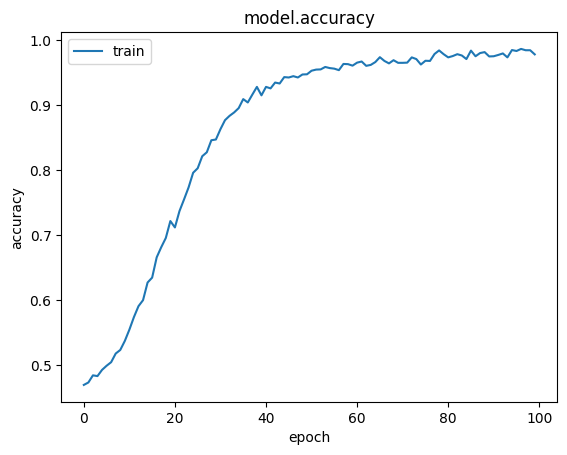

Test: accuracy = 0.620609  ;  loss = 2.675688


In [ ]:

model.save('modell.h5') 

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model.accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

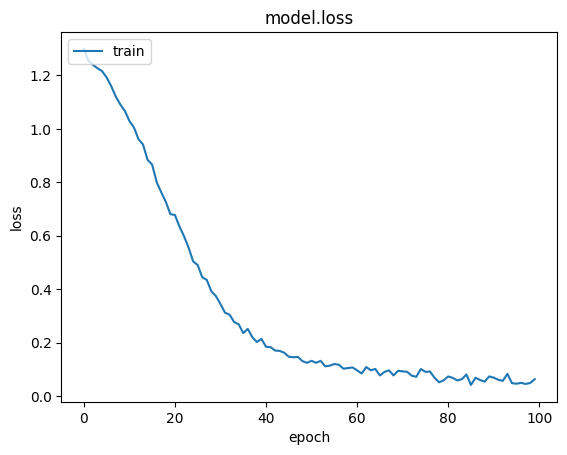

In [ ]:
plt.plot(history.history['loss'])
plt.title('model.loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc="upper left")
plt.show()

In [ ]:
from matplotlib import pyplot as plt

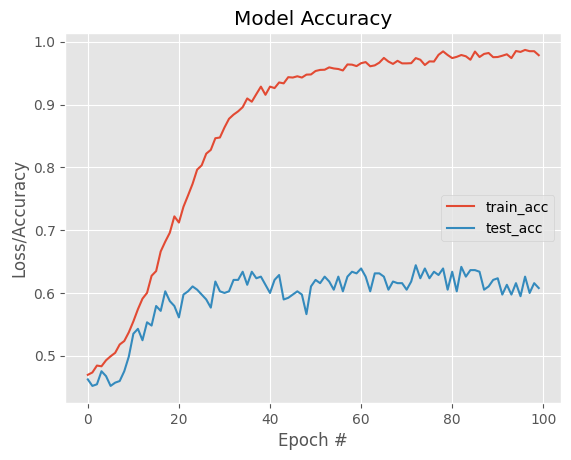

In [ ]:

N = 100
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="test_acc")
plt.title("Model Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [ ]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")


test loss: 2.6756880283355713 %
test accuracy: 0.620608925819397 %


1/1 [==============================] - 0s 103ms/step
A.I predicts: Normal
Correct prediction for label 1 is Mild


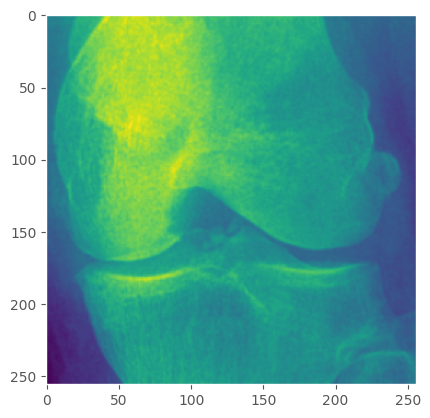

In [ ]:
X = 32

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

14/14 [==============================] - 0s 34ms/step


<Figure size 640x480 with 0 Axes>

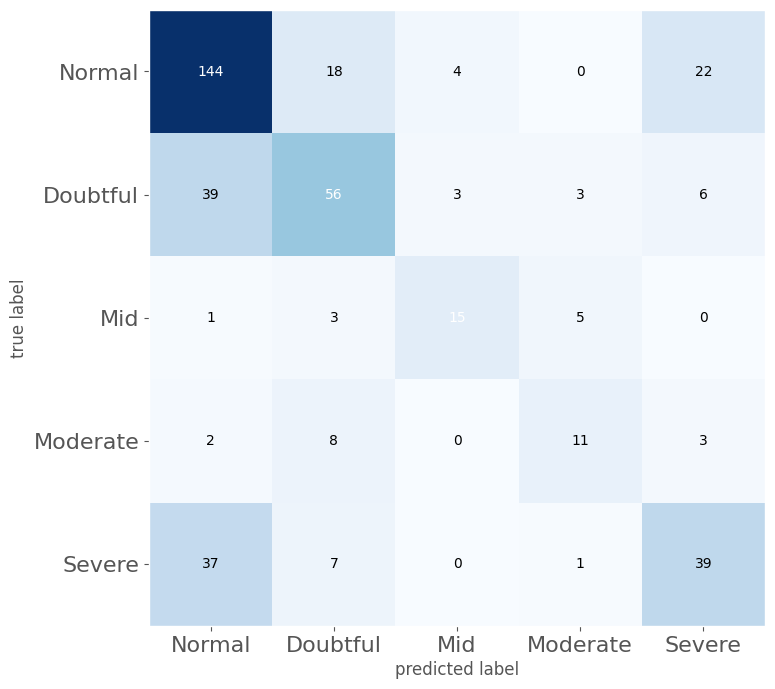

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()